1. piano_listen.wav를 read하고 소리를 들어보세요.

In [1]:
import numpy as np
import thinkdsp


# 파일 읽기
wave = thinkdsp.read_wave("C:/Users/com22/Desktop/piano_listen.wav")
wave.make_audio()  # 소리 듣기


2. piano_listen.wav의 framerate은?

In [2]:
print("Framerate:", wave.framerate)

Framerate: 44100


3. piano_listen.wav에는 몇 개의 음계가 포함되어 있는가?

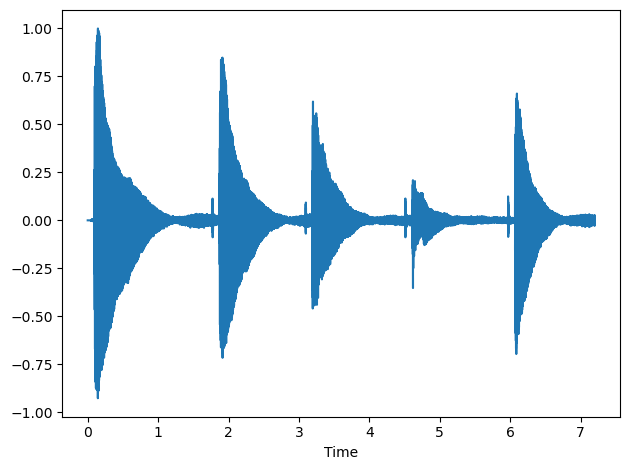

In [3]:
from thinkdsp import decorate
wave.plot()
decorate(xlabel="Time")

시간에 따른 wave그래프를 봤을 때 눈에 띄는 큰 진폭은 5개 나온다. piano_listen.wav에 총 5개의 음계가 포함되어있음을 알 수 있다.

4. spectrum 분석을 이용하여 piano_listen.wav에 포함되어 있는 음을 모두 순서대로 찾으세요.

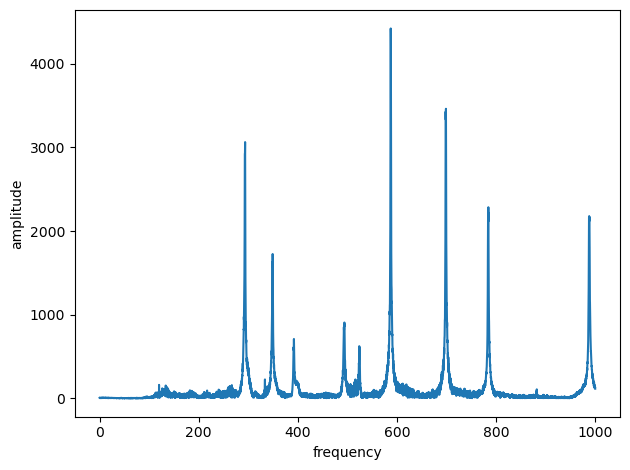

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot(high = 1000)
decorate(xlabel = "frequency", ylabel = "amplitude")

amp가 가장 큰 5개의 피크를 순서대로 뽑아보면 261, 587, 698, 783, 987 주파수를 가진다.
각 주파수는 C4, D5, F5, G5, B5 음계를 가진다.

5. autocorrelation을 이용하여 piano_listen.wav에 포함되어 있는 음을 모두 순서대로 찾으세요.

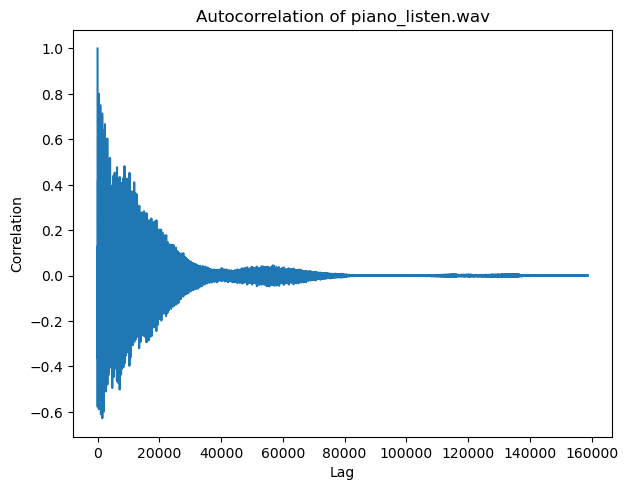

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate

#wave 신호를 lag만큼 밀었을 때, 원본 신호와의 상관계수를 계산하는 함수
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

#여러 lag 값에 대해 serial_corr를 반복해서 autocorrelation 전체를 계산하는 함수
def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

#autocorrelation 계산
lags, corrs = autocorr(wave)

#autocorrelation plot
plt.plot(lags, corrs)
decorate(xlabel='Lag', ylabel='Correlation')
plt.title('Autocorrelation of piano_listen.wav')
plt.show()

주요 peak가 발생하는 lag범위를 확인 후 구간을 확대

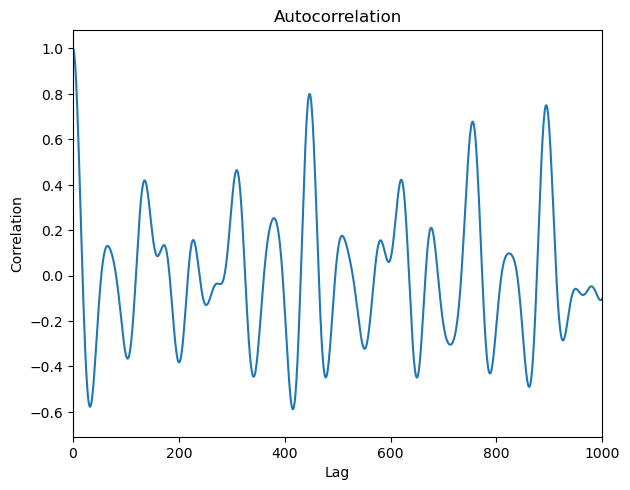

In [8]:
# autocorrelation 계산
lags, corrs = autocorr(wave)

# autocorrelation plot
import matplotlib.pyplot as plt
plt.plot(lags, corrs)
plt.xlim(0, 1000)  # X축을 0~1000 lag까지만 보기
decorate(xlabel='Lag', ylabel='Correlation')
plt.title('Autocorrelation')
plt.show()

frequency = framerate / lag

lag 170,  주파수 44100/170 -> 약 259Hz, 예상 음계 C4
lag 75,  주파수 44100/75 -> 약 588Hz, 예상 음계 D5
lag 63,  주파수 44100/63 -> 약 700Hz, 예상 음계 F5
lag 56,  주파수 44100/56 -> 약 786Hz, 예상 음계 G5
lag 45,  주파수 44100/45 -> 약 980Hz, 예상 음계 B5

6. piano_listen.wav를 분석해보고 디지털신호처리 관점에서 느낀점은?

autocorrelation 그래프가 peak간섭이 생겨 음계가 lag와 정확히 일치하지 않을 수 있다. 따라서 autocorrelation으로 음계 후보를 찾고 스펙트럼 분석을 통해 정확한 주파수를 보정하면 좋을 것 같다.